# Laboratorium 3: Segmentacja obrazów

### Wprowadzenie
Segmentacja obrazów to proces podziału obrazu na regiony o podobnych cechach (np. jasności, kolorze, teksturze).
Celem segmentacji jest lokalizacja obiektów i ekstrakcja informacji w celu dalszej analizy.

Wyróżnia się kilka podstawowych podejść do segmentacji:
- **Progowanie globalne** (*thresholding*),
- **Progowanie adaptacyjne**,
- **Segmentacja oparta na krawędziach** (Sobel, Canny),
- **Segmentacja regionów** (Watershed).


### Wzory matematyczne

#### 1. Progowanie globalne
$$
I'(x,y) = 
\begin{cases}
1, & I(x,y) \geq T, \\
0, & I(x,y) < T,
\end{cases}
$$
gdzie $T$ – próg jasności.

#### 2. Progowanie adaptacyjne
$$
I'(x,y) = 
\begin{cases}
1, & I(x,y) \geq T(x,y), \\
0, & I(x,y) < T(x,y),
\end{cases}
$$
gdzie $T(x,y)$ zależy od lokalnego otoczenia piksela.

#### 3. Operator Sobela
$$
G = \sqrt{G_x^2 + G_y^2},
$$
gdzie
$$
G_x = I * S_x, \quad G_y = I * S_y,
$$
a $S_x, S_y$ to maski Sobela.


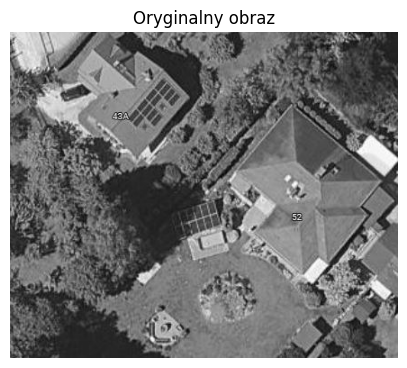

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\5.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\6.jpg"

obraz=obraz1

# Wczytanie obrazu w odcieniach szarości
image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap="gray")
plt.title("Oryginalny obraz")
plt.axis("off")
plt.show()

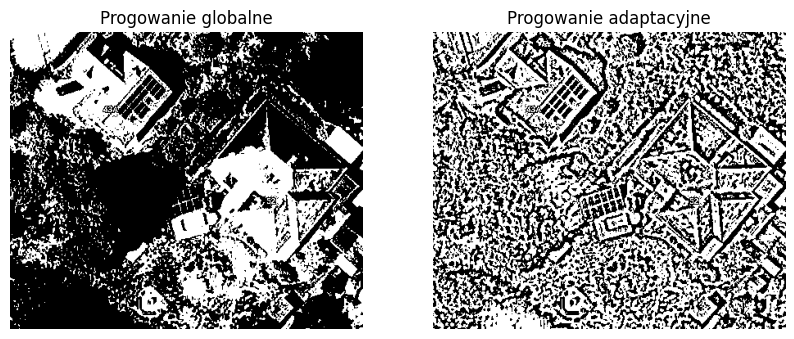

In [10]:
# Progowanie globalne
_, thresh_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Progowanie adaptacyjne
thresh_adapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(thresh_global, cmap="gray")
axes[0].set_title("Progowanie globalne")
axes[0].axis("off")

axes[1].imshow(thresh_adapt, cmap="gray")
axes[1].set_title("Progowanie adaptacyjne")
axes[1].axis("off")
plt.show()

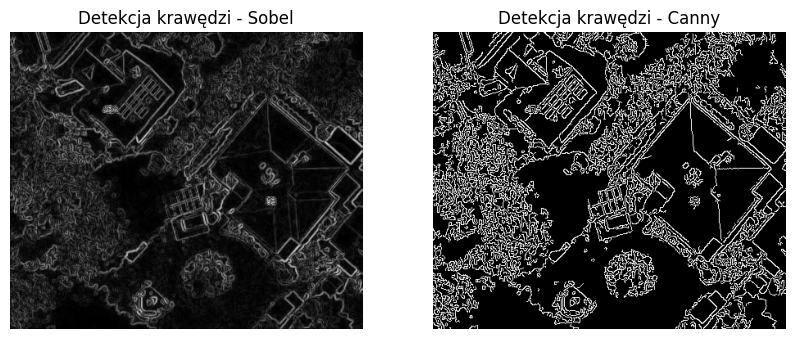

In [6]:
# Detektor Sobela
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Detektor Canny
canny = cv2.Canny(image, 100, 200)

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(sobel, cmap="gray")
axes[0].set_title("Detekcja krawędzi - Sobel")
axes[0].axis("off")

axes[1].imshow(canny, cmap="gray")
axes[1].set_title("Detekcja krawędzi - Canny")
axes[1].axis("off")
plt.show()

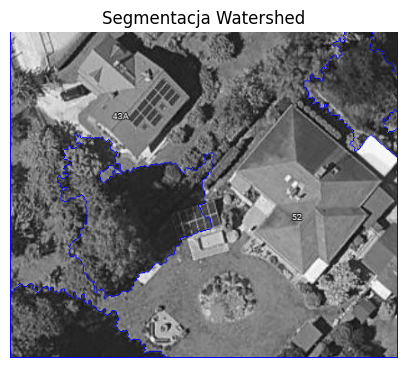

In [4]:
# Segmentacja Watershed
# Konwersja do BGR (wymagane przez algorytm)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Binaryzacja obrazu
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Operacje morfologiczne
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=3)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Konwersja typów
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Etykietowanie
_, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

# Watershed
markers = cv2.watershed(image_color, markers)
image_color[markers == -1] = [255,0,0]

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Segmentacja Watershed")
plt.axis("off")
plt.show()

### Podsumowanie
W tym laboratorium zastosowano różne techniki segmentacji obrazu:
- progowanie globalne i adaptacyjne,
- detekcję krawędzi (Sobel, Canny),
- segmentację opartą na regionach (Watershed).

Każda metoda ma inne właściwości – progowanie działa dobrze na obrazach o wyraźnym kontraście,
Sobel i Canny wydobywają krawędzie, a Watershed pozwala rozdzielać sąsiadujące obiekty.


Zadanie do wykonania

1. Przygotowanie danych: Wybierz zestaw obrazów, na których będą prowadzone eksperymenty w
zakresie segmentacji. Obrazy powinny zawierać różne obiekty, które mają zostać wyróżnione.
2. Segmentacja przy użyciu progowania: Zaimplementuj algorytmy progowania, takie jak
progowanie globalne i lokalne. Przetestuj różne wartości progów i oceniaj wyniki pod kątem
jakości segmentacji. Stosując różne wartości progów, można zobaczyć, jak wpływają na jakość
segmentacji obrazów. Wartości progów mogą być dostosowane do konkretnej aplikacji lub
rodzaju obiektów do segmentacji.
3. Segmentacja na podstawie kształtów: Wykorzystaj techniki segmentacji oparte na kształtach
obiektów, takie jak rozpoznawanie konturów i analiza kształtów obiektów. Zaimplementuj
algorytmy, które wykrywają obiekty o określonych kształtach, takie jak okręgi, prostokąty, lub
elipsy.
4. Segmentacja przy użyciu uczenia maszynowego: Stwórz model uczenia maszynowego, który
będzie w stanie dokładnie segmentować obiekty na obrazach. Możesz wykorzystać popularne
biblioteki do uczenia maszynowego, takie jak scikit-learn lub TensorFlow.

1. Przygotowanie środowiska

Import bibliotek

Wczytanie przykładowych obrazów

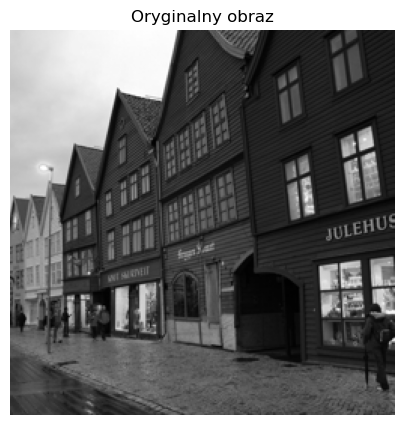

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure

# Funkcja pomocnicza do wyświetlania
def show_image(img, title="Obraz", cmap="gray"):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Wczytanie obrazu
image = cv2.imread("10s.png", cv2.IMREAD_GRAYSCALE)
show_image(image, "Oryginalny obraz")


2. Segmentacja przy użyciu progowania

Progowanie globalne (stały próg, Otsu)

Progowanie lokalne (adaptacyjne)

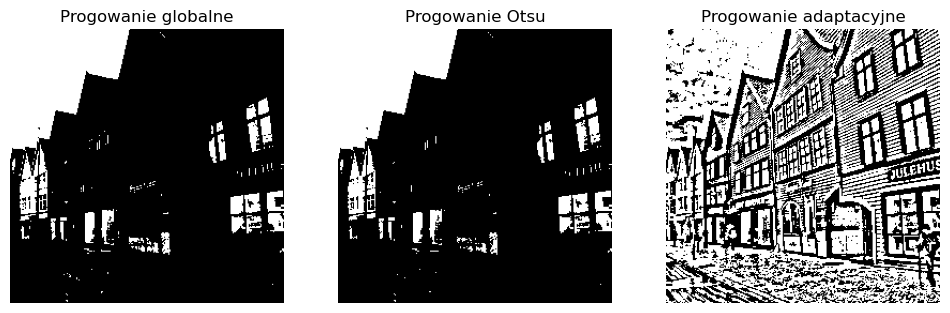

In [3]:
# Progowanie globalne
T = 128
_, global_thresh = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)

# Otsu
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptacyjne
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Wizualizacja
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].imshow(global_thresh, cmap="gray"); axs[0].set_title("Progowanie globalne")
axs[1].imshow(otsu_thresh, cmap="gray"); axs[1].set_title("Progowanie Otsu")
axs[2].imshow(adaptive_thresh, cmap="gray"); axs[2].set_title("Progowanie adaptacyjne")
for ax in axs: ax.axis("off")
plt.show()


3. Segmentacja na podstawie kształtów

Wykrywanie konturów

Analiza kształtów (prostokąty, koła, elipsy)

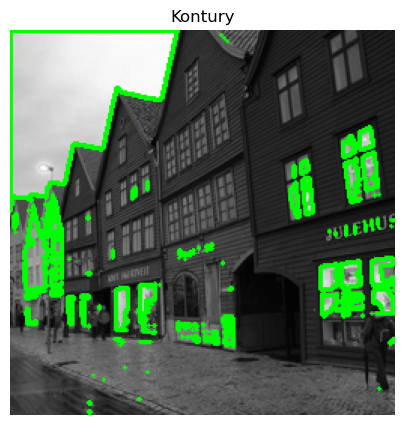

Kołowość: 0.5390120920947209
Kołowość: 0.0
Kołowość: 0.0
Kołowość: 0.0
Kołowość: 0.1849597093244486
Kołowość: 0.0929223300676956
Kołowość: 0.0
Kołowość: 0.4192316296468001
Kołowość: 0.0
Kołowość: 0.24626773441295843
Kołowość: 0.0
Kołowość: 0.21434290252196572
Kołowość: 0.0
Kołowość: 0.0
Kołowość: 0.0
Kołowość: 0.16122901519013072
Kołowość: 0.1367023277138338
Kołowość: 0.17083383857780127
Kołowość: 0.0
Kołowość: 0.09808208363663097
Kołowość: 0.0
Kołowość: 0.2486299159760465
Kołowość: 0.2573362529189966
Kołowość: 0.641141357875468
Kołowość: 0.3677539733755266
Kołowość: 0.06582975964058575
Kołowość: 0.19276314419912155
Kołowość: 0.0
Kołowość: 0.4860765901471373
Kołowość: 0.6662308698336755
Kołowość: 0.21434290252196572
Kołowość: 0.4248306390411815
Kołowość: 0.21393782543717227
Kołowość: 0.5390120952601716
Kołowość: 0.6462701752225273
Kołowość: 0.0
Kołowość: 0.6051155797957867
Kołowość: 0.2668865408085674
Kołowość: 0.0
Kołowość: 0.0
Kołowość: 0.0
Kołowość: 0.02766252551125515
Kołowość: 0.0

In [4]:
# Kontury
contours, _ = cv2.findContours(otsu_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)

show_image(img_contours, "Kontury")

# Analiza kształtów – kołowość
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if perimeter > 0:
        circularity = 4*np.pi*(area/(perimeter**2))
        print("Kołowość:", circularity)


4. Segmentacja przy użyciu uczenia maszynowego

Przykład z klasyfikacją pikseli (k-means):

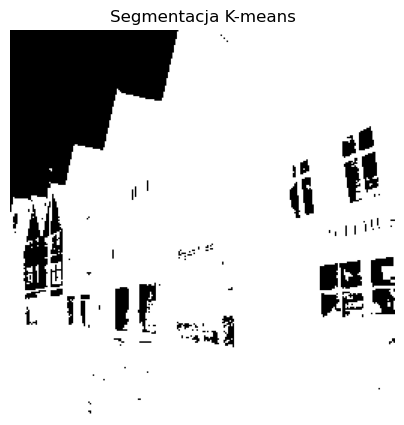

In [5]:
# K-means clustering dla segmentacji
Z = image.reshape((-1,1))
Z = np.float32(Z)
K = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented = labels.reshape(image.shape)

show_image(segmented*127, "Segmentacja K-means")


4.Pytania kontrolne
1. Czym jest segmentacja obrazów i dlaczego jest istotna w przetwarzaniu obrazów?
2. Jakie są główne kategorie technik segmentacji obrazów, a w jakich przypadkach są one
stosowane?
3. Jak działa algorytm progowania w kontekście segmentacji obrazów? Jakie wyzwania może
stwarzać?
4. Jakie są różnice między progowaniem globalnym a progowaniem lokalnym? Kiedy warto
zastosować jedno z nich, a kiedy drugie?
5. Jakie są podstawowe etapy procesu segmentacji na podstawie kształtów obiektów? Jakie rodzaje
obiektów można wykryć przy użyciu tych technik?
6. Jakie są zalety i ograniczenia segmentacji opartej na kształtach obiektów w porównaniu z innymi
technikami?
7. Jakie są podstawowe zastosowania uczenia maszynowego w procesie segmentacji obrazów? Jakie
rodzaje modeli mogą być wykorzystane do tego celu?
8. Jakie są metryki oceny jakości segmentacji obrazów? Jakie wskaźniki pomagają ocenić
skuteczność segmentacji?
9. Jakie są wyzwania związane z segmentacją obrazów w zmieniających się warunkach
oświetleniowych lub w przypadku obiektów o złożonych kształtach?
10. Jakie są praktyczne zastosowania segmentacji obrazów w rzeczywistych systemach i aplikacjach,
takich jak rozpoznawanie twarzy, autonomiczne pojazdy lub medycyna?

# from pdf

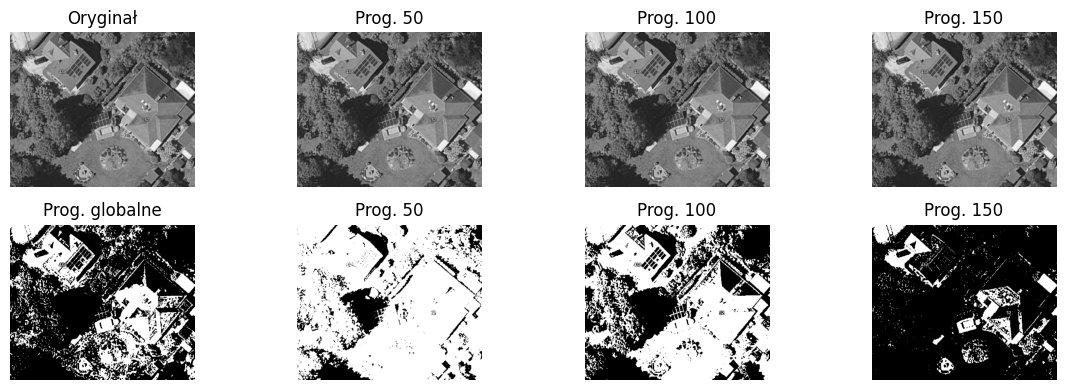

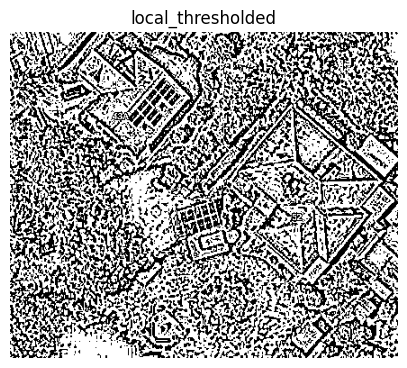

In [41]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Wczytaj obraz do analizy 

obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\5.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\6.jpg"

obraz=obraz1

image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE) 

# Algorytm progowania globalnego 
_, global_thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) 
local_thresholded = cv2.adaptiveThreshold(image, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) 

# Przykłady różnych wartości progów 
threshold_values = [50, 100, 150] 

# Inicjalizacja subplotów 
fig, axes = plt.subplots(2, len(threshold_values) + 1, figsize=(12, 4)) 

# Obraz oryginalny 
axes[0, 0].imshow(image, cmap='gray') 
axes[0, 0].set_title('Oryginał') 

# Segmentacja przy użyciu progowania globalnego 
axes[1, 0].imshow(global_thresholded, cmap='gray') 
axes[1, 0].set_title('Prog. globalne') 

# Przetestuj różne wartości progów i oceniaj jakość segmentacji 
for i, threshold_value in enumerate(threshold_values): 
    _, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY) 
    axes[0, i+1].imshow(image, cmap='gray') 
    axes[0, i+1].set_title(f'Prog. {threshold_value}') 
    axes[1, i+1].imshow(thresholded, cmap='gray') 
    axes[1, i+1].set_title(f'Prog. {threshold_value}') 

# Ukrycie osi 
for ax in axes.ravel(): 
    ax.axis('off') 
plt.tight_layout() 

plt.figure(figsize=(5,5))
plt.imshow(local_thresholded, cmap="gray")
plt.title("local_thresholded")
plt.axis("off")

plt.show() 

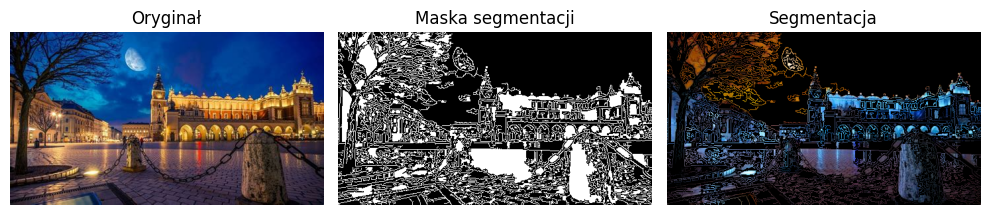

True

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\5.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\6.jpg"

number=4
obraz=obraz4

image = cv2.imread(obraz, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Wykrywanie krawędzi
edges = cv2.Canny(image_gray, threshold1=30, threshold2=100)

# Znajdź kontury
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lista kształtów do detekcji
shapes = ['Okręgi', 'Prostokąty', 'Elipsy']

# Tworzymy maskę segmentacji (pustą)
segmentation_mask = np.zeros(image_gray.shape, dtype=np.uint8)

# Wykrywanie obiektów i rysowanie ich na masce
for shape_type in shapes:
    if shape_type == 'Okręgi':
        detected_objects = [c for c in contours if len(cv2.approxPolyDP(c, 0.04 * cv2.arcLength(c, True), True)) > 8]
    elif shape_type == 'Prostokąty':
        detected_objects = [c for c in contours if len(cv2.approxPolyDP(c, 0.04 * cv2.arcLength(c, True), True)) == 4]
    elif shape_type == 'Elipsy':
        detected_objects = [c for c in contours if len(c) >= 5]
    
    # Rysujemy wykryte obiekty na masce (wypełnione białe)
    cv2.drawContours(segmentation_mask, detected_objects, -1, 255, thickness=cv2.FILLED)

# Wyświetlamy obraz oryginalny i maskę
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Oryginał")
axes[0].axis('off')

axes[1].imshow(segmentation_mask, cmap='gray')
axes[1].set_title("Maska segmentacji")
axes[1].axis('off')

segmented_object = cv2.bitwise_and(image, image, mask=segmentation_mask)

axes[2].imshow(segmented_object, cmap='gray')
axes[2].set_title("Segmentacja")
axes[2].axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite(f'results/segmentation_mask{number}.jpg', segmentation_mask)

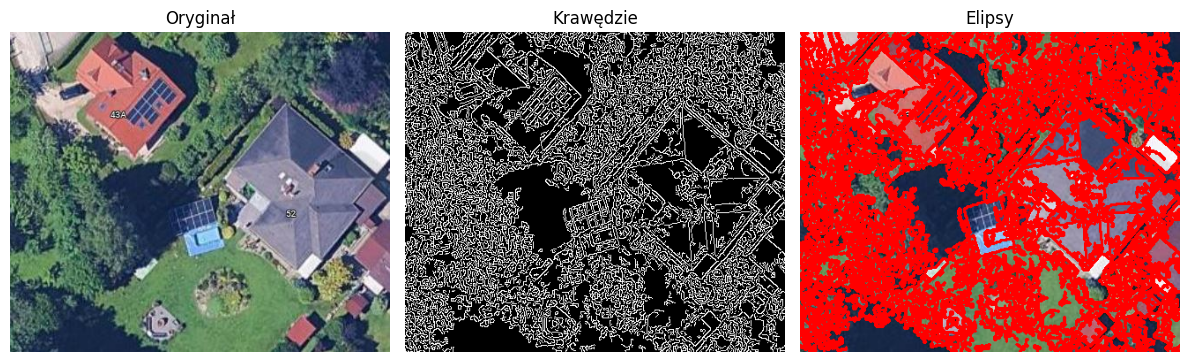

In [33]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Wczytaj obraz do analizy (upewnij się, że obraz zawiera obiekty o różnych kształtach) 

image = cv2.imread(obraz, cv2.IMREAD_COLOR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Wykrywanie krawędzi za pomocą algorytmu Canny 
edges = cv2.Canny(image_gray, threshold1=30, threshold2=100) 

# Znajdź kontury obiektów na obrazie 
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# Inicjalizacja subplotów 
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

# Obraz oryginalny 
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Oryginał') 
    
# Krawędzie obiektów 
axes[1].imshow(edges, cmap='gray') 
axes[1].set_title('Krawędzie') 
               
# Wykrywanie obiektów o określonych kształtach 
shapes = ['Okręgi', 'Prostokąty', 'Elipsy'] 
for shape_type in shapes: 
    detected_objects = [] 
    if shape_type == 'Okręgi': 
        detected_objects = [c for c in contours if len(cv2.approxPolyDP(c, 0.04 * cv2.arcLength(c, True), True)) > 8] 
    elif shape_type == 'Prostokąty': 
        detected_objects = [c for c in contours if len(cv2.approxPolyDP(c, 0.04 * cv2.arcLength(c, True), True)) == 4] 
    elif shape_type == 'Elipsy': 
        detected_objects = [c for c in contours if len(c) >= 5] 
        
    # Tworzenie kopii obrazu i rysowanie konturów wykrytych obiektów 
    image_with_contours = image.copy() 
    cv2.drawContours(image_with_contours, detected_objects, -1, (0, 0, 255), 2) 
    axes[2].imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)) 
    axes[2].set_title(f'{shape_type}') 
    
# Ukrycie osi 
for ax in axes: 
    ax.axis('off') 
plt.tight_layout() 
plt.show() 

In [ ]:
import cv2 
import numpy as np 
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt 

obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\5.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\6.jpg"

segmented1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson3\Results\segmentation_mask1.jpg"
segmented2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson3\Results\segmentation_mask2.jpg"
segmented3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson3\Results\segmentation_mask3.jpg"
segmented4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson3\Results\segmentation_mask4.jpg"

segmented=segmented1
obraz=obraz1

# Wczytaj obraz do segmentacji 
image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE) 

# Wczytaj oznaczenia pikseli na obrazie (maskę segmentacji) 
segmentation_mask = cv2.imread(segmented, cv2.IMREAD_GRAYSCALE) 

# Przygotowanie danych treningowych 
height, width = image.shape

# Tworzymy siatkę współrzędnych pikseli
xx, yy = np.meshgrid(np.arange(width), np.arange(height))

# Spłaszczamy i łączymy do macierzy cech X
X = np.column_stack((xx.ravel(), yy.ravel()))

# Etykiety z maski
y = segmentation_mask.ravel()

# Stworzenie modelu SVM 
model = make_pipeline(StandardScaler(), SVC(kernel='linear')) 

# Trenowanie modelu 
model.fit(X, y) 

# Przewidywanie segmentacji na obrazie 
segmented_image = model.predict(X).reshape(height, width) 

# Inicjalizacja subplotów 
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

# Obraz oryginalny 
axes[0].imshow(image, cmap='gray') 
axes[0].set_title('Oryginał') 

# Maska segmentacji (znanie poprawnych oznaczeń) 
axes[1].imshow(segmentation_mask, cmap='gray') 
axes[1].set_title('Maska segmentacji') 

# Obraz segmentowany przy użyciu modelu SVM 
axes[2].imshow(segmented_image, cmap='gray') 
axes[2].set_title('Segmentacja') 

# Ukrycie osi 
for ax in axes: 
    ax.axis('off') 
    
plt.tight_layout() 
plt.show() 

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# Wczytaj obraz do analizy 
image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE) 

# Algorytm progowania globalnego 
_, global_thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) 

# Przykłady różnych wartości progów 
threshold_values = [50, 100, 150] 

# Inicjalizacja subplotów 
fig, axes = plt.subplots(2, len(threshold_values) + 1, figsize=(12, 4)) 

# Obraz oryginalny 
axes[0, 0].imshow(image, cmap='gray') 
axes[0, 0].set_title('Oryginał') 

# Segmentacja przy użyciu progowania globalnego 
axes[1, 0].imshow(global_thresholded, cmap='gray') 
axes[1, 0].set_title('Prog. globalne') 

# Przetestuj różne wartości progów i oceniaj jakość segmentacji 
for i, threshold_value in enumerate(threshold_values): 
    _, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY) 
        axes[0, i+1].imshow(image, cmap='gray') 
    axes[0, i+1].set_title(f'Prog. {threshold_value}') 
    axes[1, i+1].imshow(thresholded, cmap='gray') 
    axes[1, i+1].set_title(f'Prog. {threshold_value}') 

# Ukrycie osi 
for ax in axes.ravel(): 
    ax.axis('off') 

plt.tight_layout() 
plt.show() 

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# Wczytaj obraz do analizy (upewnij się, że obraz zawiera obiekty o różnych kształtach) 
image = cv2.imread(obraz, cv2.IMREAD_COLOR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Wykrywanie krawędzi za pomocą algorytmu Canny 
edges = cv2.Canny(image_gray, threshold1=30, threshold2=100) 

# Znajdź kontury obiektów na obrazie 
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# Inicjalizacja subplotów 
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

# Obraz oryginalny 
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
axes[0].set_title('Oryginał') 

# Krawędzie obiektów 
axes[1].imshow(edges, cmap='gray') 
axes[1].set_title('Krawędzie') 

# Obraz segmentowany na podstawie kształtów (wykrywanie okręgów) 
detected_circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, 
param1=50, param2=30, minRadius=0, maxRadius=0) 
if detected_circles is not None: 
    detected_circles = np.uint16(np.around(detected_circles)) 
    for circle in detected_circles[0, :]: 
        cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 0, 255), 2) 
        
axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
axes[2].set_title('Segmentacja na podstawie kształtów (okręgi)') 
# Ukrycie osi 

for ax in axes: 
    ax.axis('off') 
    
plt.tight_layout() 
plt.show() 

In [ ]:
import cv2 
import numpy as np 
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt 

# Wczytaj obraz do segmentacji 
image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE) 

# Wczytaj oznaczenia pikseli na obrazie (maskę segmentacji) 
segmentation_mask = cv2.imread('maska_segmentacji.jpg', cv2.IMREAD_GRAYSCALE) 

# Przygotowanie danych treningowych 
height, width = image.shape 
X = np.column_stack((np.arange(height), np.arange(width))) 
y = segmentation_mask.ravel() 

# Stworzenie modelu SVM 
model = make_pipeline(StandardScaler(), SVC(kernel='linear')) 

# Trenowanie modelu 
model.fit(X, y) 

# Przewidywanie segmentacji na obrazie 
segmented_image = model.predict(X).reshape(height, width) 

# Inicjalizacja subplotów 
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

# Obraz oryginalny 
axes[0].imshow(image, cmap='gray') 
axes[0].set_title('Oryginał') 

# Maska segmentacji (znanie poprawnych oznaczeń) 
axes[1].imshow(segmentation_mask, cmap='gray') 
axes[1].set_title('Maska segmentacji') 

# Obraz segmentowany przy użyciu modelu SVM 
axes[2].imshow(segmented_image, cmap='gray') 
axes[2].set_title('Segmentacja przy użyciu uczenia maszynowego (SVM)') 

# Ukrycie osi 
for ax in axes: 
    ax.axis('off') 

plt.tight_layout() 
plt.show() 